# Movie Industry Correlation Analysis

#### Questions to verify
- Budget will have high correlation with gross

- Company will have high correlation with gross

#### Content
There are 6820 movies in the dataset (220 movies per year, 1986-2016). Each movie has the following attributes:

- budget: the budget of a movie. Some movies don't have this, so it appears as 0

- company: the production company

- country: country of origin

- director: the director

- genre: main genre of the movie.

- gross: revenue of the movie

- name: name of the movie

- rating: rating of the movie (R, PG, etc.)

- released: release date (YYYY-MM-DD)

- runtime: duration of the movie

- score: IMDb user rating

- votes: number of user votes

- star: main actor/actress

- writer: writer of the movie

- year: year of release

#### Acknowledgement
This data was scraped from IMDb and it can be found [here](https://www.kaggle.com/datasets/danielgrijalvas/movies)

#### Importing libraries

In [3]:
import numpy as np
import pandas as pd

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, matplotlib

import numpy as np
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # to adjust the configuration of plot

#### Defining the path and reading the csv file

In [11]:
movie_df = pd.read_csv(r'C:\Users\kasho\Desktop\pythonProject\movies.csv')

#### Let's take a look at our dataframe.

In [94]:
movie_df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,2847246203,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,2797501328,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,2201647264,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,2069521700,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,2048359754,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27


#### Let's have a look at the datatype of the columns

In [13]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


#### Let's check for any null values

In [14]:
missing_value = movie_df.isnull().sum()
missing_value

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

#### Deleting the rows of the columns which contain the null values

In [15]:
movie_df.dropna(subset = ['star'], axis = 0, how = 'any', inplace = True)
movie_df.dropna(subset = ['released'], axis = 0, how = 'any', inplace = True)
movie_df.dropna(subset = ['country'], axis = 0, how = 'any', inplace = True)
movie_df.dropna(subset = ['writer'], axis = 0, how = 'any', inplace = True)
movie_df.dropna(subset = ['runtime'], axis = 0, how = 'any', inplace = True)
movie_df.dropna(subset = ['score'], axis = 0, how = 'any', inplace = True)
movie_df.dropna(subset = ['company'], axis = 0, how = 'any', inplace = True)

#### Let's check the summary for missing values in the columns

In [16]:
movie_df.isna().sum()

name           0
rating        69
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2157
gross        179
company        0
runtime        0
dtype: int64

#### Replacing the missing values with the mean of budget and gross columns

In [17]:
movie_df['budget'].fillna(movie_df['budget'].mean(), inplace = True)
movie_df['gross'].fillna(movie_df['gross'].mean(), inplace = True)

#### Filling the missing data with the most frequent value for rating column

In [18]:
movie_df['rating'].value_counts().idxmax()

'R'

#### It looks like the most common rating is R. Let's replace the missing values with R.

In [19]:
movie_df['rating'].fillna('R', inplace = True)

#### Now let's Change data types of columns


In [20]:
movie_df['budget'] = movie_df['budget'].astype('int64')
movie_df['gross'] = movie_df['gross'].astype('int64')
movie_df['votes'] = movie_df['gross'].astype('int64')

#### The released column is in campatible format. Let's change that with datetime.

In [21]:
movie_df['format_released'] = pd.to_datetime(movie_df['released'].str.extract(r'(\w+ \d+, \d+)', expand=False), format='%B %d, %Y')

#### Let's make another column from our new column format_released

In [22]:
movie_df['year'] = movie_df['format_released'].dt.year

#### Let's also sort the gross column in descending order

In [31]:
movie_df.sort_values(by = ['gross'], inplace = True, ascending=False)

#### Lets drop the column year

In [33]:
movie_df.drop(columns = 'year', inplace = True)

In [35]:
pd.reset_option('^display.', silent=True)

#### Now let's drop any duplicates in our df and show unique values

In [36]:
movie_df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2378, dtype: object

In [37]:
movie_df.drop_duplicates()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,2847246203,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,2797501328,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,2201647264,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,2069521700,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,2048359754,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,"February 9, 2001 (United States)",6.5,1400,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35651716,1400,British Broadcasting Corporation (BBC),103.0,2001-02-09
7625,The Untold Story,R,Comedy,"January 11, 2019 (United States)",5.7,790,Shane Stanley,Lee Stanley,Miko Hughes,United States,35651716,790,Visual Arts Entertainment,104.0,2019-01-11
7580,Run with the Hunted,Not Rated,Crime,"June 26, 2020 (United States)",5.2,682,John Swab,John Swab,Ron Perlman,United States,35651716,682,Roxwell Films,93.0,2020-06-26
2417,Madadayo,R,Drama,"April 17, 1993 (Japan)",7.3,596,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993-04-17


## Questions to verify

1. Budget will have high correlation with gross

2. Company will have high correlation with gross

#### Let's do a scatter plot of gross vs budget

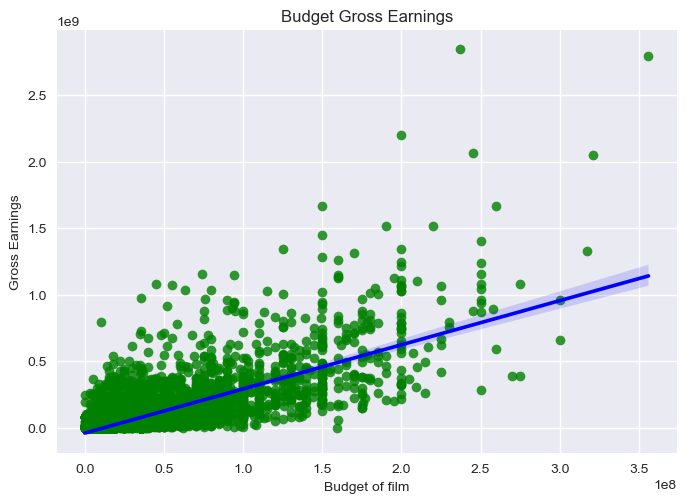

In [49]:
sns.regplot(data = movie_df, x = movie_df.budget, y = movie_df.gross, 
            scatter_kws = {'color' : 'g'}, line_kws = {'color' : 'blue'})
plt.title('Budget Gross Earnings')
plt.tight_layout
plt.xlabel('Budget of film')
plt.ylabel('Gross Earnings')
plt.show()

We can a positive correlation between gross earnings and budget of the film

#### Let's use 'Kendall' to explore any correlations between nurmeric key columns

In [50]:
movie_df.corr(method = 'kendall')

,score,votes,budget,gross,runtime
score,1.000000,0.080301,0.003378,0.080301,0.283436
votes,0.080301,1.000000,0.260190,1.000000,0.155632
budget,0.003378,0.260190,1.000000,0.260190,0.161941
gross,0.080301,1.000000,0.260190,1.000000,0.155632
runtime,0.283436,0.155632,0.161941,0.155632,1.000000


#### Let's do a heatmap with peason method to better visualize the correlation

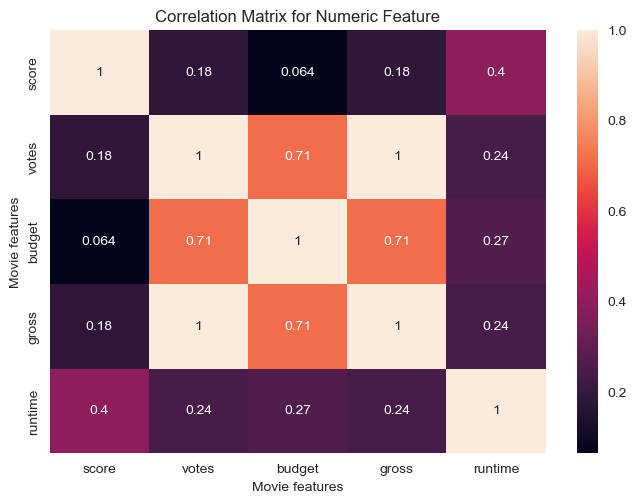

In [96]:
correlation_matrix = movie_df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)  #annot toggle value
plt.title('Correlation Matrix for Numeric Feature')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

Now we can see that budget is stronly related to the gross earnings. Not only that but we also see some other correlations. For example, we can see a positive relationship between budget and voters. Let's keep exploring.

##### Let's see the correlation between all the elements.

In [52]:
# We need to numerized all non numerical values in dataframe to gain this insight

df_numerized = df.copy()


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0


#### Let's see the correlation now.


In [53]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174


#### Let's create a heatmap of the correlations

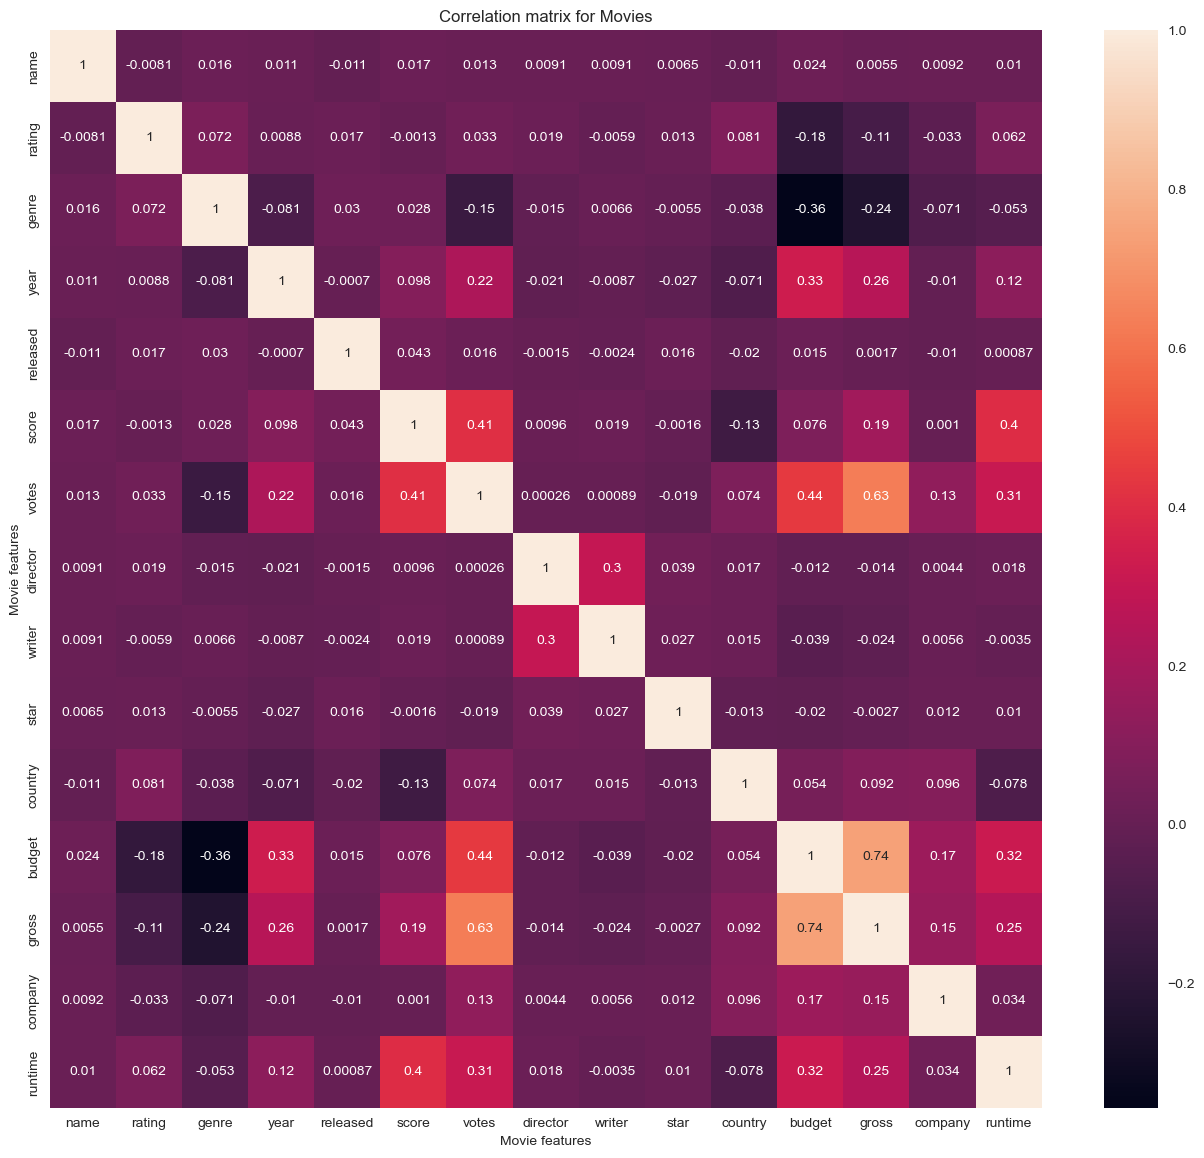

In [97]:
# find correlation in heatmap chart

correlation_matrix = df_numerized.corr(method='pearson')
plt.figure(figsize = (16,14))
sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")


plt.show()

We can see from the heatmap that no correlation can be found in the company and gross revenue of a movie. So, the second question/assumption turned out to be not true. Let's see if voters(popularity) and genres have a correlation.

#### Let's create a bar chart of the voters and genres

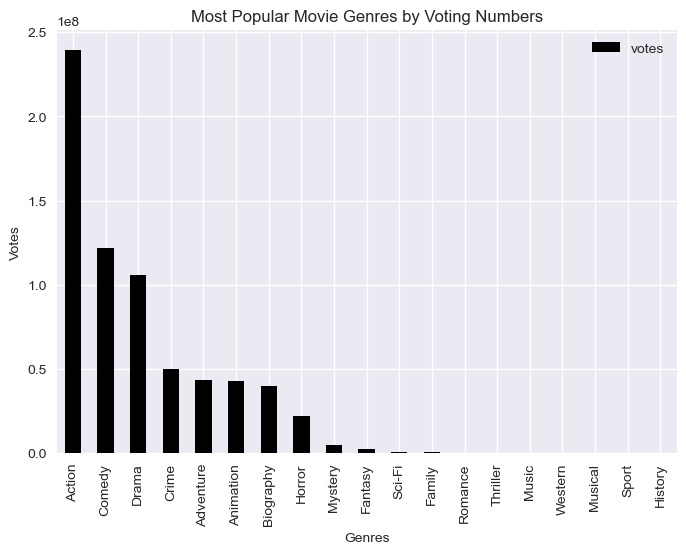

In [63]:
# find most popular genre by vote

ax = df[['genre','votes']].groupby(['genre']).sum().sort_values(by=['votes'], ascending=False)\
.plot(kind='bar', color = 'k', title = 'Most Popular Movie Genres by Voting Numbers')

ax.set_xlabel('Genres') #labeling the x axis
ax.set_ylabel('Votes')

plt.show()

We can also see that popularity translates well to gross revenue. If we see the graph below we can see that the most popular genre is the same with the best grossing genres.

#### Let's create another bar graph of gross revenue by genres

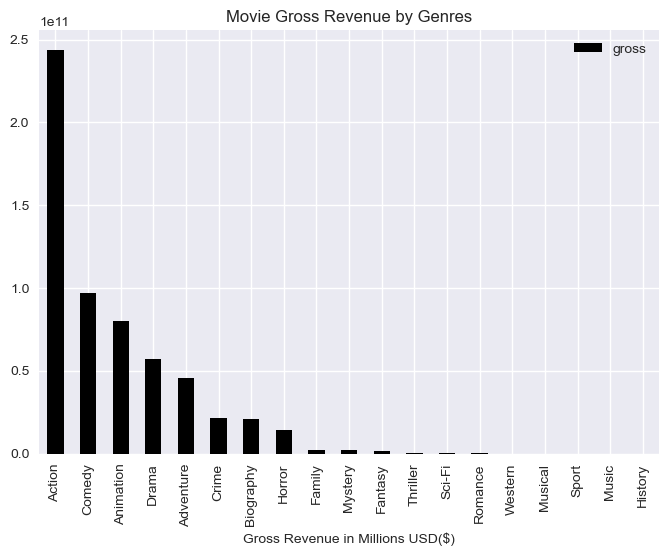

In [68]:
ax = df[['genre','gross']].groupby(['genre']).sum().sort_values(by=['gross'], ascending=False)\
.plot(kind='bar', color = 'k', title = 'Movie Gross Revenue by Genres')

ax.set_xlabel('Gross Revenue in Millions USD($)')
plt.show()

If we also look at the number of gross revenue, action genre is still dominating. However, in terms of IMDB user ratings, the action genre is not the leader. History takes the first spot when we look at the average score.

#### Installing prettytable

In [74]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


#### Let's create a table of genre against Average Score

In [75]:
from prettytable import PrettyTable

# Group data by genre and compute the mean score
df_genre_score_mean = df[['genre','score']].groupby(['genre']).mean().sort_values(by=['score'], ascending=False)

# Create a table with two columns
table = PrettyTable()
table.field_names = ["Genre", "Average Score"]

# Iterate over the data and add rows to the table
for index, row in df_genre_score_mean.iterrows():
    table.add_row([index, round(row['score'], 2)])

# Set table properties
table.align["Genre"] = "l"  # left align the genre column
table.align["Average Score"] = "r"  # right align the score column
table.padding_width = 1  # add some padding to the cells

# Print the table
print(table)

+-----------+---------------+
| Genre     | Average Score |
+-----------+---------------+
| History   |           8.3 |
| Musical   |          8.05 |
| Music     |           7.2 |
| Biography |          7.03 |
| Animation |          6.77 |
| Drama     |          6.69 |
| Crime     |          6.67 |
| Mystery   |          6.67 |
| Romance   |          6.41 |
| Family    |          6.36 |
| Adventure |          6.29 |
| Sci-Fi    |          6.21 |
| Action    |           6.2 |
| Comedy    |          6.19 |
| Fantasy   |          6.01 |
| Thriller  |          5.91 |
| Sport     |           5.9 |
| Horror    |          5.75 |
| Western   |          5.67 |
+-----------+---------------+


So it is shown that popularity of a movie doesn't necessarily make it highly rated one



#### Let's see how the actors, actresses, and directors stack against highest grossing movies

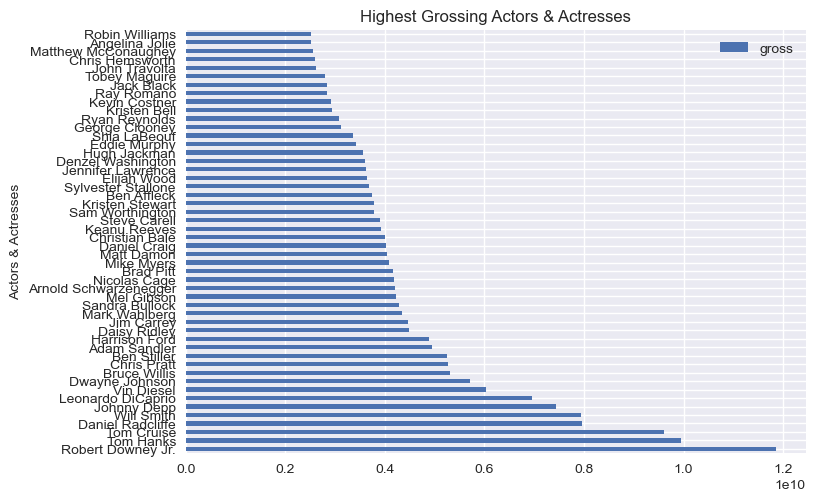

In [76]:
ax = df[['star','gross']].groupby('star').sum().sort_values(by=['gross'], ascending=False).head(50)\
.plot(kind='barh', title='Highest Grossing Actors & Actresses')
ax.set_ylabel('Actors & Actresses')
plt.show()

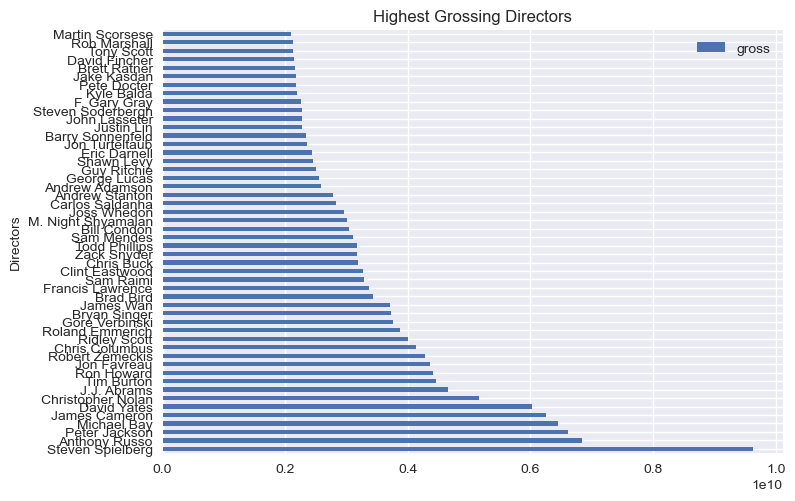

In [77]:
ax = df[['director','gross']].groupby('director')\
.sum().sort_values(by=['gross'], ascending=False).head(50).plot(kind='barh', title='Highest Grossing Directors')
ax.set_ylabel('Directors')
plt.show()

In conclusions if a movie wants have a higher chance of higher gross, the producer needs to consider all data shown above. There are many data-driven insights that can be drawn from the data and the correlations we looked at were driven by the two questions we asked. The data can be explored for any questions from the stakeholders.

##### Thank you